In [1]:
import numpy as np
import xarray as xr
import pickle as pk
import pandas as pd
from scipy.stats import sem
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib as mpl
mpl.rc('font',size=16,**{'family':'sans-serif','sans-serif':['Arial']})

In [2]:
adj = {}
adj['x4'] = pk.load(open('../Data/Outputs/EB/f.e12.abrupt-4xCO2.T31_g37.ctl.2_EB_gam.pk', 'rb'))
adj['sol'] = pk.load(open('../Data/Outputs/EB/f.e12.abrupt-0.96xTSI.T31_g37.ctl.2_EB_gam.pk', 'rb'))

adj['x4']['ta_tropo'] = adj['x4']['lapse']+adj['x4']['Planck']
adj['sol']['ta_tropo'] = adj['sol']['lapse']+adj['sol']['Planck']

adj['net'] = {}
for keys in adj['x4'].keys():
    adj['net'][keys] = adj['x4'][keys]+adj['sol'][keys]

In [3]:
adj['x4']['Planck']

array([-1.66872203, -1.38939656, -1.37695876, -1.63964895, -1.56120679,
       -1.47929954, -1.74469215, -1.52045722, -1.46570066, -1.46849017,
       -1.58812486, -1.6793031 , -1.52933609, -1.52259331, -1.35523274,
       -1.52744387, -1.64488157, -1.51896591, -1.52318937, -1.42552005,
       -1.48033896, -1.52913756, -1.41682865, -1.37768035, -1.64300006,
       -1.58462286, -1.52872881, -1.45550008, -1.59592115, -1.44363421])

In [4]:
adj['x4']['lapse']

array([ 0.13483084, -0.03494887, -0.08446007,  0.17188883,  0.00958192,
        0.07534945,  0.03106101,  0.08301015,  0.11958952, -0.05643438,
       -0.03333002, -0.03735858, -0.00827261,  0.01449297, -0.03951416,
        0.042525  , -0.04492093, -0.06484746, -0.04983411,  0.04350721,
       -0.10953262, -0.07060009, -0.02685017, -0.11732854,  0.04067699,
        0.05035963,  0.10727591,  0.16585009,  0.04489724, -0.04483982])

In [5]:
adj['sol']['Planck']

array([0.63307978, 0.71170495, 0.65836227, 0.7328777 , 0.7442549 ,
       0.82918107, 0.78967292, 0.90890935, 0.75328486, 0.92324462,
       0.65370207, 0.7336273 , 0.71776031, 0.75020888, 0.90167075,
       0.88272319, 0.70790214, 0.65088393, 0.9097694 , 0.84616008,
       0.8556191 , 0.72970663, 0.92065794, 0.84057683, 0.8907641 ,
       1.06666169, 0.81981898, 0.79787721, 0.94751027, 0.75423925])

In [6]:
adj['sol']['lapse']

array([0.38313497, 0.43576554, 0.40839312, 0.4858271 , 0.33010311,
       0.29567228, 0.37637657, 0.26308218, 0.36713193, 0.38507431,
       0.52647642, 0.4463008 , 0.46411421, 0.42606079, 0.50551762,
       0.3571189 , 0.4167269 , 0.44964326, 0.21904845, 0.34681956,
       0.43001285, 0.44918756, 0.34532782, 0.41976999, 0.42329811,
       0.28586184, 0.38715998, 0.48695447, 0.44910947, 0.29346816])

In [7]:
mn = {}
se = {}
for exp in adj.keys():
    mn[exp] = {}
    se[exp] = {}
    for just in adj[exp].keys():
    
        mn[exp][just] = np.nanmean(adj[exp][just])
        se[exp][just] = sem(adj[exp][just])

se_df = pd.DataFrame.from_dict(se)
mn_df = pd.DataFrame.from_dict(mn)

In [8]:
mn_df

,x4,sol,net
salb,0.245076,-0.168488,0.076587
ta_strato,1.280879,0.231453,1.512332
lapse,0.010394,0.395285,0.405679
Planck,-1.522819,0.802080,-0.720738
q_strato,0.006466,-0.017574,-0.011107
q_tropo,0.229205,-0.564704,-0.335500
cld_lw,-0.262003,0.266337,0.004335
cld_sw,2.183266,0.112847,2.296114
IRF,5.363685,-9.226207,-3.862522
cld_sw_lo,0.529249,0.337247,0.866496


In [8]:
conffinal = {}
p1final = {}
for exp in adj.keys():
    conffinal[exp] = {}
    p1final[exp] = {}

    conffinal[exp]['$\lambda_{a}$'] = se[exp]['salb']
    conffinal[exp]['$\lambda_{T-s}$'] = se[exp]['ta_strato']
    conffinal[exp]['$\lambda_{P}$'] = se[exp]['Planck']
    conffinal[exp]['$\lambda_{lr}$'] = se[exp]['lapse']
    conffinal[exp]['$\lambda_{wv-t}$'] = se[exp]['q_tropo']+se[exp]['q_strato']
    conffinal[exp]['$\lambda_{c-lw}$'] = se[exp]['cld_lw']
    conffinal[exp]['$\lambda_{c-sw}$'] = se[exp]['cld_sw']

    conffinal[exp]['$\lambda_{net}$'] = np.sum(list(conffinal[exp].values()))

    p1final[exp]['$A_{a}$'] = mn[exp]['salb']
    p1final[exp]['$A_{T-s}$'] = mn[exp]['ta_strato']
    p1final[exp]['$A_{P}$'] = mn[exp]['Planck']
    p1final[exp]['$A_{lr}$'] = mn[exp]['lapse']
    p1final[exp]['$A_{wv}$'] = mn[exp]['q_tropo']+mn[exp]['q_strato']
    p1final[exp]['$A_{c-lw}$'] = mn[exp]['cld_lw']
    p1final[exp]['$A_{c-sw}$'] = mn[exp]['cld_sw']

    p1final[exp]['$A_{net}$'] = np.sum(list(p1final[exp].values()))

In [9]:
error_plot = {}

for exp in adj.keys():
    error_plot[exp] = np.stack(conffinal[exp].values(),axis=0)

/Users/johnvirgin/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [10]:
p1final

{'x4': {'$A_{a}$': 0.24507550292998934,
  '$A_{T-s}$': 1.280879270368758,
  '$A_{P}$': -1.5228185459132733,
  '$A_{lr}$': 0.010394144244096576,
  '$A_{wv}$': 0.23567090855769945,
  '$A_{c-lw}$': -0.262002517941548,
  '$A_{c-sw}$': 2.1832662811096992,
  '$A_{net}$': 2.170465043355421},
 'sol': {'$A_{a}$': -0.16848829567799245,
  '$A_{T-s}$': 0.2314532232631977,
  '$A_{P}$': 0.8020804167917001,
  '$A_{lr}$': 0.3952846086756641,
  '$A_{wv}$': -0.5822780046616367,
  '$A_{c-lw}$': 0.26633717034754806,
  '$A_{c-sw}$': 0.11284728275619867,
  '$A_{net}$': 1.0572364014946793},
 'net': {'$A_{a}$': 0.0765872072519968,
  '$A_{T-s}$': 1.5123324936319553,
  '$A_{P}$': -0.7207381291215731,
  '$A_{lr}$': 0.4056787529197606,
  '$A_{wv}$': -0.3466070961039373,
  '$A_{c-lw}$': 0.004334652406000144,
  '$A_{c-sw}$': 2.2961135638658976,
  '$A_{net}$': 3.2277014448501}}

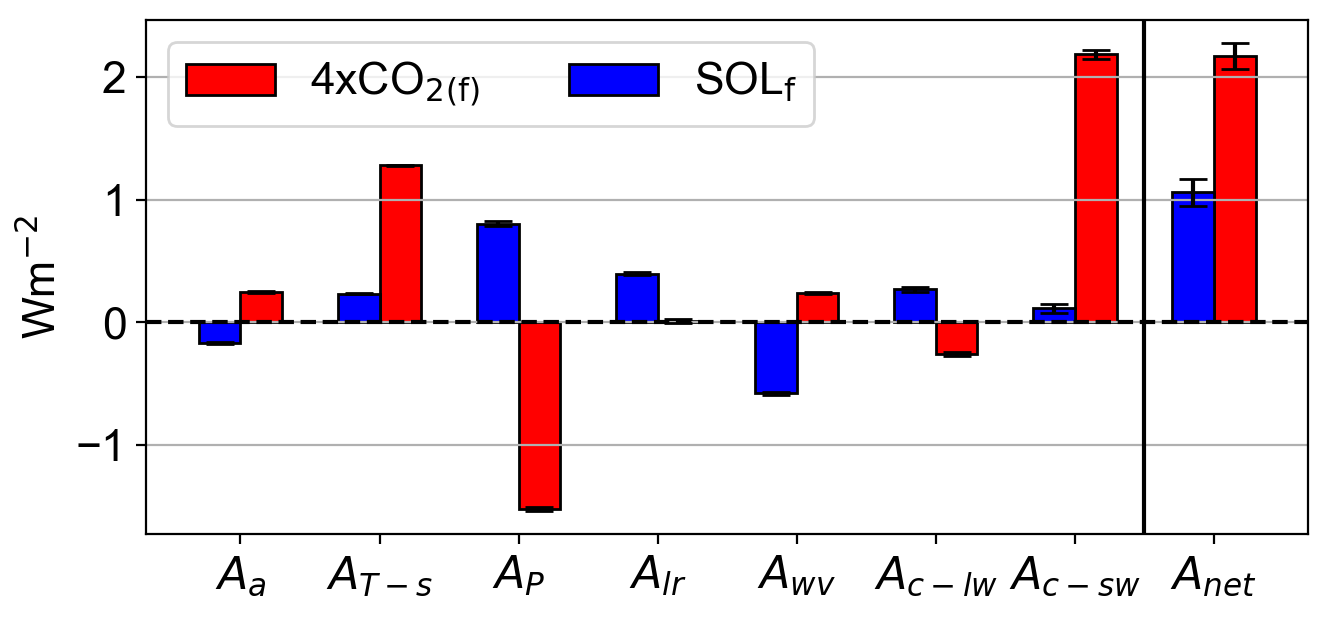

In [13]:
plt.figure(figsize=(7.5,7.5),dpi=200)

plt.subplot(211)
plt.bar(np.arange(8),list(p1final['x4'].values()), width=0.3,align='edge',edgecolor='k', color='red', yerr=error_plot['x4'], capsize=5, alpha=1, label = '4xCO$_{2}$$_{\mathrm{(f)}}$')
plt.bar(np.arange(8),list(p1final['sol'].values()), width=-0.3,align='edge',edgecolor='k', color='blue', yerr=error_plot['sol'], capsize=5,alpha=1, label = 'SOL$_{\mathrm{f}}$')
plt.axhline(0,color='k',linestyle = '--')
plt.axvline(6.5,color='k')
plt.grid(axis='y')
plt.legend(ncol=2)
plt.ylabel('Wm$^{-2}$')
plt.xticks(np.arange(8),labels = list(p1final['x4'].keys()));

plt.savefig('adj_bar.png',bbox_inches='tight')